# Introducción


En este cuaderno de Colab se mostrará el funcionamiento del filtro de imágen: Sobel Filer. El objetivo del filtro perteneciente a los algoritmos de detección de bordes, es hallar los bordes de una imagen donde hay mayor intensidad, aplicando diferenciales matemáticas en los ejes X e Y y aplicando el gradiente. 

El operador Sobel calcula el gradiente de la intensidad de una imagen en cada punto (píxel). Así, para cada punto, este operador da la magnitud del mayor cambio posible, la dirección de este y el sentido desde oscuro a claro. Para cada punto de la imagen, el vector gradiente apunta en dirección del incremento máximo posible de la intensidad, y la magnitud del vector gradiente corresponde a la cantidad de cambio de la intensidad en esa dirección.

# Armado de ambiente


En este cuaderno ejecutaremos código CPU y GPU, por lo tanto debemos tener en cuenta las siguientes consideraciones:



1.   Habilitar el entorno GPU.

    Para esto hay que ir a la opcion de **Ver Recursos -> Entorno de ejecución -> Cambiar tipo de entorno de ejecución**.
    Luego seleccionar GPU como *acelerador de hardware* y guardar.
2.  Ejecutar código para armado del ambiente.

    A continuacion hay que instalar **pycuda** para trabajar con la programacion GPU. Debemos ejecutar el siguiente codigo para poder construir el ambiente.



In [ ]:
url_imagen = "https://64.media.tumblr.com/d69c4501235857c84e9017a2fdf6a720/68ab801c2660e680-a0/s1280x1920/5bfdad0edc3d65c92c9a9eaceb1379774d09277b.jpg" #@param {type:"string"}

# TODO: Mejorar informaciòn y resutlado de ejecución. 
!wget {url_imagen} -O imagen.jpg

!pip install pycuda

%matplotlib inline
from datetime import datetime
# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

--2021-11-22 17:21:06--  https://64.media.tumblr.com/d69c4501235857c84e9017a2fdf6a720/68ab801c2660e680-a0/s1280x1920/5bfdad0edc3d65c92c9a9eaceb1379774d09277b.jpg
Resolving 64.media.tumblr.com (64.media.tumblr.com)... 192.0.77.3
Connecting to 64.media.tumblr.com (64.media.tumblr.com)|192.0.77.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402710 (393K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>] 393.27K  --.-KB/s    in 0.1s    

2021-11-22 17:21:06 (3.48 MB/s) - ‘imagen.jpg’ saved [402710/402710]

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 66 kB 4.8 MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627871 sha256=168828aa9b77c197f4f070e2ed7887821b4

# Desarrollo CPU

Imagen del filtro: imagen.jpg -RGB- [1280, 1280]
Tiempo de conversión de imagen: 28248.387 [ms]
Tiempo Total: 28377.953 [ms]


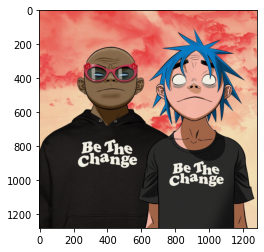

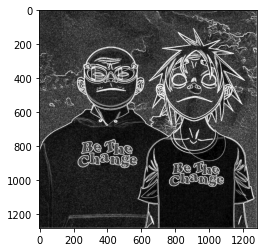

In [ ]:
tiempo_total_CPU = datetime.now()

import  matplotlib.pyplot as plt
import numpy as np
from PIL import Image 
import math

img_nombre = 'imagen.jpg'
image = Image.open( img_nombre ) 
  
# Optengo las proporsiones de la imagen. 
img_ancho, img_alto = image.size 

# Creo la nueva imagen SobelFilter en RGB con las dimensiones originales
sobelImg = Image.new("RGB", (img_ancho, img_alto), "white")

# Muestro los atributos de la imagen y como se ve antes del seudo filtro.
print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

plt.figure()
imgplot=plt.imshow( image )

tiempo_img_CPU = datetime.now()

for x in range(1, img_ancho-1):  # ignore the edge pixels for simplicity (1 to width-1)
    for y in range(1, img_alto-1): # ignore edge pixels for simplicity (1 to height-1)

        # initialise Gx to 0 and Gy to 0 for every pixel
        Gx = 0
        Gy = 0

        # top left pixel
        p = image.getpixel((x-1, y-1))
        r = p[0]
        g = p[1]
        b = p[2]

        # intensity ranges from 0 to 765 (255 * 3)
        intensity = r + g + b

        # accumulate the value into Gx, and Gy
        Gx += -intensity
        Gy += -intensity

        # remaining left column
        p = image.getpixel((x-1, y))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += -2 * (r + g + b)

        p = image.getpixel((x-1, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += -(r + g + b)
        Gy += (r + g + b)

        # middle pixels
        p = image.getpixel((x, y-1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gy += -2 * (r + g + b)

        p = image.getpixel((x, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gy += 2 * (r + g + b)

        # right column
        p = image.getpixel((x+1, y-1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += (r + g + b)
        Gy += -(r + g + b)

        p = image.getpixel((x+1, y))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += 2 * (r + g + b)

        p = image.getpixel((x+1, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += (r + g + b)
        Gy += (r + g + b)

        # calculate the length of the gradient (Pythagorean theorem)
        length = math.sqrt((Gx * Gx) + (Gy * Gy))

        # normalise the length of gradient to the range 0 to 255
        #length = length / 4328 * 255

        if(length > 255):
          length = 255

        length = int(length)

        # draw the length in the edge image
        #newpixel = img.putpixel((length,length,length))
        sobelImg.putpixel((x,y),(length,length,length))


tiempo_img_CPU = datetime.now() - tiempo_img_CPU

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot = plt.imshow( sobelImg )

tiempo_total_CPU = datetime.now() - tiempo_total_CPU

print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img_CPU   ), "[ms]" )
print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total_CPU ), "[ms]" )

# Desarrollo GPU

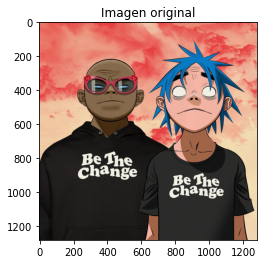

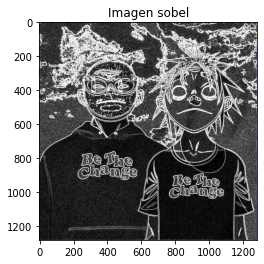

In [ ]:
%matplotlib inline
from datetime import datetime

# Tiempo en CPU + GPU
tiempo_total_GPU = datetime.now()

import matplotlib.pyplot as plt
import numpy
from PIL import Image 
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule
import cv2

img_nombre = 'imagen.jpg'
image = Image.open(img_nombre) 

# summarize some details about the image
img_ancho, img_alto = image.size 

# Convierto la imagen comprimida en JPEG/PNG a array
img_O_cpu = numpy.asarray(image)
img_R_cpu = numpy.empty_like(img_O_cpu)

#img_O_cpu = img_picR_cpu

# Reservo los 2 vectores en GPU(3 pixeles usa RGB * (el tamaño del array))
img_O_gpu = cuda.mem_alloc( img_O_cpu.nbytes )
img_R_gpu = cuda.mem_alloc( img_R_cpu.nbytes )

# GPU - Copio la memoria al GPU.
cuda.memcpy_htod( img_O_gpu, img_O_cpu )
cuda.memcpy_htod( img_R_gpu, img_R_cpu )

# CPU - Defino la función kernel que ejecutará en GPU.
module = SourceModule("""
__global__ void kernel_img( int ancho, int alto, char *img_O, char *img_R )
{
    int idx = threadIdx.x + blockIdx.x*blockDim.x;
    int currentIdx = 0;
    int idy = threadIdx.y + blockIdx.y*blockDim.y;
    int currentIdy = 0;
    float r = 0;
    float g = 0;
    float b = 0;
    float intensity = 0;

    float Gx = 0;
    float Gy = 0;
    float length = 0;

    if (idx > 0 && idx < ancho - 1 && idy > 0 && idy < alto - 1)
    {

        //top left pixel
        //p = image.getpixel((x-1, y-1))
        currentIdx = idx - 1;
        currentIdy = idy - 1;
        r = (float)img_O[(currentIdx+(currentIdy*ancho))*3    ];  // Componente Rojo del pixel.
        g = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+1];  // Componente Verde del pixel.
        b = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+2];   // Componente Azul del pixel.

        intensity = r + g + b;

        Gx += -intensity;
        Gy += -intensity;


        //remaining left column
        //p = image.getpixel((x-1, y))
        currentIdx = idx - 1;
        currentIdy = idy;
        r = (float)img_O[(currentIdx+(currentIdy*ancho))*3    ];  // Componente Rojo del pixel.
        g = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+1];  // Componente Verde del pixel.
        b = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+2];   // Componente Azul del pixel.

        Gx += -2 * (r + g + b);
        
        //p = image.getpixel((x-1, y+1))
        currentIdx = idx - 1;
        currentIdy = idy + 1;
        r = (float)img_O[(currentIdx+(currentIdy*ancho))*3    ];  // Componente Rojo del pixel.
        g = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+1];  // Componente Verde del pixel.
        b = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+2];   // Componente Azul del pixel.

        Gx += -(r + g + b);
        Gy += (r + g + b);


        //middle pixels
        //p = image.getpixel((x, y-1))
        currentIdx = idx;
        currentIdy = idy - 1;
        r = (float)img_O[(currentIdx+(currentIdy*ancho))*3    ];  // Componente Rojo del pixel.
        g = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+1];  // Componente Verde del pixel.
        b = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+2];   // Componente Azul del pixel.

        Gy += -2 * (r + g + b);

        //p = image.getpixel((x, y+1))
        currentIdx = idx;
        currentIdy = idy + 1;
        r = (float)img_O[(currentIdx+(currentIdy*ancho))*3    ];  // Componente Rojo del pixel.
        g = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+1];  // Componente Verde del pixel.
        b = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+2];   // Componente Azul del pixel.

        Gy += 2 * (r + g + b);


        //right column
        //p = image.getpixel((x+1, y-1))
        currentIdx = idx + 1;
        currentIdy = idy - 1;
        r = (float)img_O[(currentIdx+(currentIdy*ancho))*3    ];  // Componente Rojo del pixel.
        g = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+1];  // Componente Verde del pixel.
        b = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+2];   // Componente Azul del pixel.

        Gx += (r + g + b);
        Gy += -(r + g + b);

        //p = image.getpixel((x+1, y))
        currentIdx = idx + 1;
        currentIdy = idy;
        r = (float)img_O[(currentIdx+(currentIdy*ancho))*3    ];  // Componente Rojo del pixel.
        g = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+1];  // Componente Verde del pixel.
        b = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+2];   // Componente Azul del pixel.

        Gx += 2 * (r + g + b);

        //p = image.getpixel((x+1, y+1))
        currentIdx = idx + 1;
        currentIdy = idy + 1;
        r = (float)img_O[(currentIdx+(currentIdy*ancho))*3    ];  // Componente Rojo del pixel.
        g = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+1];  // Componente Verde del pixel.
        b = (float)img_O[((currentIdx+(currentIdy*ancho))*3)+2];   // Componente Azul del pixel.

        Gx += (r + g + b);
        Gy += (r + g + b);

        //calculate the length of the gradient (Pythagorean theorem)
        length = sqrt( (float) (Gx * Gx) + (Gy * Gy));

        //normalise the length of gradient to the range 0 to 255
        //length = length / 4328 * 255;

        if(length > 255)
          length = 255;

        //length = (int) length;

        // Escribo el color del pixel.
        img_R[(idx+(idy*ancho))*3  ] = (int) length;
        img_R[(idx+(idy*ancho))*3+1] = (int) length;
        img_R[(idx+(idy*ancho))*3+2] = (int) length;
    }
}
""") 

# CPU - Genero la función kernel.
kernel = module.get_function("kernel_img")

# Definimos las dimensiones de hilos y bloques
dim_hilo_x = 16
dim_bloque_x = numpy.int( (img_ancho+dim_hilo_x-1) / dim_hilo_x )

dim_hilo_y = 19
dim_bloque_y = numpy.int( (img_alto+dim_hilo_y-1) / dim_hilo_y )

# Obtenemos el tiempo actual antes de la ejecución
tiempo_img_GPU = datetime.now()

# Llamamos a la ejecución del filtro
kernel(numpy.int32(img_ancho), numpy.int32(img_alto), img_O_gpu, img_R_gpu, block=( dim_hilo_x, dim_hilo_y, 1 ), grid=(dim_bloque_x, dim_bloque_y,1))

# Obtenemos la diferencia de tiempo para saber cuanto tiempo estuvo ejecutando
tiempo_img_GPU = datetime.now() - tiempo_img_GPU

# GPU - Copio el resultado desde la memoria GPU.
cuda.memcpy_dtoh(img_R_cpu, img_R_gpu)

# Muestro la imagen Original el filtro.
plt.figure()
plt.title("Imagen original")
imgplot=plt.imshow(img_O_cpu)

plt.figure()
plt.title("Imagen sobel")
imgplot=plt.imshow(img_R_cpu)

tiempo_total_GPU = datetime.now() - tiempo_total_GPU

# Metricas


In [ ]:
print( "Tiempo de conversión de imagen CPU:", tiempo_en_ms( tiempo_img_CPU   ), "[ms]" )
print( "Tiempo Total CPU:",                   tiempo_en_ms( tiempo_total_CPU ), "[ms]" )
print("-"*8)
print("Tiempo de conversión de imagen GPU  : ", tiempo_en_ms( tiempo_img_GPU ), "[ms]" )
print("Tiempo TOTAL GPU: ", tiempo_en_ms( tiempo_total_GPU ), "[ms]" )

Tiempo de conversión de imagen CPU: 28248.387 [ms]
Tiempo Total CPU: 28377.953 [ms]
--------
Tiempo de conversión de imagen GPU  :  0.172 [ms]
Tiempo TOTAL GPU:  132.286 [ms]


# Conclusiones

Como conclusiones, viendo las métricas obtenidas, vemos que el rendimiento al ejecutar el algoritmo del filtro con un entorno GPU y aprovechando la capacidad de los threads mejora considerablemente en comparación a la implementación CPU.

Hay que tener en cuenta que, para imágenes pequeñas, es posible que el algoritmo de CPU demore menos tiempo de ejecución. Esto se debe a que la implementación de GPU requiere un tiempo prácticamente fijo para la planificación de los threads (overhead) que en imágenes grandes pasa desapercibido.

Mientras más grande sea la imágen, mayor será la brecha de tiempos entre ambas implementaciones. Esto se debe a la grán complejidad computacional que presenta la implementación de CPU.

#Bibliografia


[1] A Descriptive Algorithm for Sobel Image Edge Detection: [Paper](https://proceedings.informingscience.org/InSITE2009/InSITE09p097-107Vincent613.pdf) 

[2] How to build amazing image filters with Python— Median filter 📷 , Sobel filter: [Link](https://dev.to/enzoftware/how-to-build-amazing-image-filters-with-python-median-filter---sobel-filter---5h7) 


